# Titanic: Machine Learning from Disaster

# 案例介绍
    泰坦尼克号的沉没是历史上伤亡人数最多、影响最深远的沉船事件之一。1912年4月15日，泰坦尼克号与冰山相撞，2224名乘客和船员中有1502人丧生。这场轰动性的悲剧震惊了国际社会，但也因此产生了更好的船舶安全法规。这次海难造成人员伤亡的原因之一是没有足够的救生艇供乘客和船员使用。
    
    虽然在沉船中幸存下来有一些运气因素，但有些人比其他人更可能存活下来。在本次学习中，在给定的部分存活人员信息中，将应用python来分析哪些乘客可能在悲剧中存活。此次，棕榈学院将携手Yiyu导师给各位想学习Python、想要在数据行业继续发展学习的同学来讲授如何完成这样一个project，相信会对你们的数据分析技能的提升大有裨益。

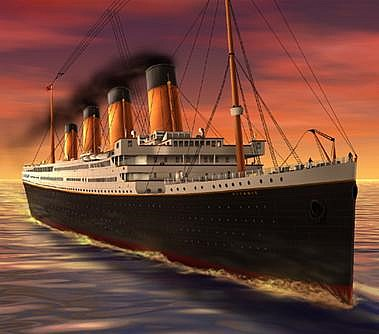

In [ ]:
#查看图片
from IPython.display import Image
Image(filename='titanic.png') 


1. 定义并理解问题
2. 获取数据
3. 观察并理解数据
4. 数据清理&数据可视化
5. 数据选取&特征工程
6. 选取模型
7. 测试训练集&测试集
8. 衡量结果

## 理解问题

 - 预测泰坦尼克号上的乘客能否存活
 - 二元分类
 - 准确率

In [83]:
#有时候运行代码时会有很多warning输出，如提醒新版本之类的，如果不想这些乱糟糟的输出可以这样：但是切记，不要盲目设置取消输出。
import warnings
warnings.filterwarnings('ignore')

## 获取数据

In [84]:
#载入pandas数据包，以pd来简化命名；Pandas是Python一个非常重要的科学计算包，数据科学家、数据分析师都会非常普遍地用到这个包；
import pandas as pd

In [85]:
#读取准备好的CSV数据，导入训练集和测试集
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [86]:
#查看训练集和测试集的数据维度
train_df.shape,test_df.shape

((891, 12), (418, 11))

## 观察并理解数据

In [87]:
#载入matplotlib包，以plt简化命名；Matplotlib是Python中一个非常重要的绘图包，大量的数据可视化工作会用到这个包；
import matplotlib.pyplot as plt

In [88]:
#读取训练集表头-就是每一个表格的Column name，列名
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [89]:
#读取测试集表头-同上
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [90]:
#观望一下数据，这个函数可以供你看到除了表头的前五行数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 - 分类变量-----PassengerID,Pclass,Name
 - 数字变量-----Age,Fare

In [91]:
#这个函数可以查看所有数据变量的类型信息，int=integer(整数)，object=对象，float=浮点数
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [92]:
#判断数据集里每一个数据变量的缺失值有多少个，我们可以看到Cabin这个变量的缺失值是最多的；
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
#对数据进行描述性统计分析，这个函数可以自动计算出每一个数字变量的平均数、标准差、分位数等等重要统计概念
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Count')

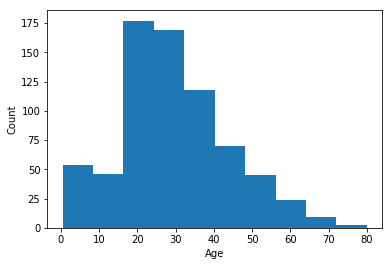

In [94]:
#绘制年龄分布直方图，横轴为年龄，纵轴为人数
plt.hist(train_df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

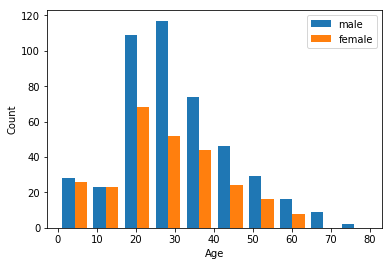

In [95]:
#这个是一个绘图函数，从matplotlib这个包里调取，绘制各年龄层性别分布直方图
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
plt.legend(['male','female'])
plt.xlabel('Age')
plt.ylabel('Count')

In [96]:
#生成交叉表，分析存活与死亡人数中性别分布
pd.crosstab(train_df['Survived'],train_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [97]:
#生成交叉表，分析存活与死亡人数中客舱等级分布
pd.crosstab(train_df['Survived'],train_df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [98]:
#根据登船城市、存活情况对数据进行分组，并统计个数
train_df.groupby(['Embarked','Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [99]:
#这个函数其实是SQL语言在Python里的一个应用，SQL语言主要负责数据管理，这句代码的意思是对python中的pandas进行sql查询
#为了方便使用，我们不用下载SQL语言，而是直接在Python里使用
from pandasql import sqldf

In [100]:
#从训练集中选择存活情况、乘客同船的父母/子女人数这几个变量进行分组计数（注意：其实这几句代码已经是SQL语言了哦）
#Select，from，Groupby这三个函数可是SQL语言里非常重要且应用普遍的函数了哦！
q1 = """
SELECT Survived,Parch,count(*) 
FROM train_df 
GROUP BY Survived,Parch
"""
sqldf(q1)

,Survived,Parch,count(*)
0,0,0,445
1,0,1,53
2,0,2,40
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,1
7,1,0,233
8,1,1,65
9,1,2,40


# 第二节课

## 数据清理&数据可视化

In [101]:
#载入numpy数据包，以np来简化命名；numpy系统是Python的一种开源的数值计算扩展,这种工具可用来存储和处理大型矩阵.
import numpy as np

In [102]:
#查看训练集的末尾几行，当然Python中，默认打印是5行
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [103]:
#判断数据集里每一个数据变量的缺失值有多少个，我们可以看到Cabin这个变量的缺失值是最多的；
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
train_df.shape

(891, 12)

In [105]:
# 填充Embarked中的missing value
train_df.Embarked = train_df['Embarked'].fillna(method = 'ffill')
#forward fill

# 计算Age中各值出现的次数，normalize=Treue表示将结果归一化到[0,1]上
s = train_df['Age'].value_counts(normalize = True)

In [106]:
# 判断每一个人的年龄数据是否为空
missing_age = train_df['Age'].isnull()
# 此处使用numpy.random的choice方法，以各年龄出现的频次为概率从所有年龄中选取缺失的年龄数目个年龄值
# 将这些随机选中的年龄值赋给缺失的年龄值
train_df.loc[missing_age,'Age'] = np.random.choice(s.index, size = 177, p=s.values)


In [107]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,23.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


s.values

In [108]:
# 使用正则表达式将Title中的称呼提取出来，如Mr.
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.',expand = False)

In [109]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [110]:
# 有的称呼可能出现多次，如 Mr Mrs，此处只显示一次


In [111]:
# 依据乘客的称呼和最后的生存情况创建交叉表
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [112]:
# 替换称呼来重新赋值Title,如将Lady Countess等出现频次较低的重新命名为Rare
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# 以下作用同上
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')


In [113]:
test_df.isnull().sum(),test_df.shape

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64, (418, 11))

In [114]:
# 通过groupby进行分组，选取Title 和 Survived两列，然后使用mean()计算每一种Title的乘客的生还率
train_df[['Title','Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [115]:
# 定义一个字典title_mapping，将原来Title中的值一次映射为字典里对应的值
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)
# 用0来填充缺失值


In [116]:
# 查看训练集的前几行，当然Python中，默认打印是5行
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [117]:
# 利用SibSp和Parch创建FamilySize和IsAlone
# SibSp: 兄弟姐妹/配偶的数量
# Parch：父母/孩子的数量
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
#IsAlone=1表明是alone的状态
train_df['IsAlone'] = 1
#0表示不是
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0



(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

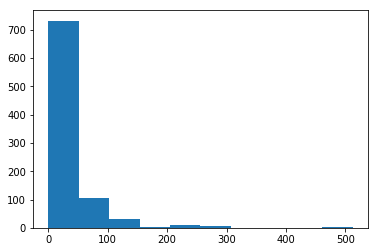

In [118]:
# 依据票价绘制直方图
plt.hist(train_df['Fare']) 

In [119]:
#利用cut把数据用25%，50%，75%进行划分
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)

In [120]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,"(7.91, 14.454]"


In [121]:
#利用cut把数据分成均等的五份
train_df['AgeBin'] = pd.cut(train_df['Age'], 5)

In [122]:
# 调用机器学习库scikit-learn中的LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [123]:
# 创建一个名为label_encode的LabelEncoder对象
label_encode = LabelEncoder()
# 有下列label
labels = ['Sex','Embarked','AgeBin','FareBin']

In [124]:
#train_df['Embarked'] = train_df['Embarked'].fillna(method = 'ffill')

In [125]:
# 遍历labels列表
for label in labels:
    print (label,type(label))
    new_label = label + '_Code'
    train_df[new_label] = label_encode.fit_transform(train_df[label])

Sex <class 'str'>
Embarked <class 'str'>
AgeBin <class 'str'>
FareBin <class 'str'>


In [126]:
#这里仍然是默认的查看训练集的前5行
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,2,0,"(-0.001, 7.91]","(16.336, 32.252]",1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,3,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,2,1,1,"(7.91, 14.454]","(16.336, 32.252]",0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,3,2,0,"(31.0, 512.329]","(32.252, 48.168]",0,2,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,1,1,"(7.91, 14.454]","(32.252, 48.168]",1,2,2,1
5,6,0,3,"Moran, Mr. James",male,23.0,0,0,330877,8.4583,...,Q,1,1,1,"(7.91, 14.454]","(16.336, 32.252]",1,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,1,1,1,"(31.0, 512.329]","(48.168, 64.084]",1,2,3,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,4,5,0,"(14.454, 31.0]","(0.34, 16.336]",1,2,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,3,3,0,"(7.91, 14.454]","(16.336, 32.252]",0,2,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,3,2,0,"(14.454, 31.0]","(0.34, 16.336]",0,0,0,2


In [127]:
original_feature = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_feature = ['Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']

In [128]:
#载入seaborn包并以sns简化命名，当你使用数据科学中的Python时，你很有可能已经用了Matplotlib,一个供你创建高质量图像的2D库。
#另一个免费的可视化库就是Seaborn,他提供了一个绘制统计图形的高级接口。Seaborn是比Matplotlib更高级的免费库，特别地以数据可视化为目标，
#Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。
#用Matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。
import seaborn as sns

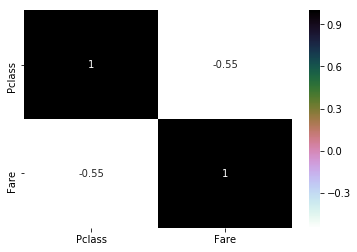

In [129]:
# 在上面，将众多属性名聚在一个list命名为new_feature
# 此处使用seaborn的heatmap方法，画出new_feature中各种特征两两之间的相似度热力图
sns.heatmap(train_df[['Pclass','Fare']].corr(),annot=True,cmap='cubehelix_r')

In [130]:
train_df['Title'].unique()

array([1, 3, 2, 4, 5])

# 第三节课

## 更多的数据清理 -- 独热编码

In [131]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
enc = OneHotEncoder()

In [133]:
onehot_features = ['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
enc.fit(train_df[onehot_features])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [134]:
enc.categories_

[array([1., 2., 3., 4., 5.]),
 array([0., 1.]),
 array([0., 1., 2.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3.])]

In [135]:
enc_res = enc.transform(train_df[onehot_features])

In [136]:
print(enc_res.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [137]:
print(enc_res.toarray().shape)

(891, 19)


In [138]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

## 特征选择&数据划分

In [139]:
original_features = ['PassengerId','Pclass', 'Name', 'Sex', 'Age' ,'SibSp', 'Parch','Ticket','Fare', 'Cabin', 'Embarked']
new_features = ['Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']


In [140]:
# 删去难以运用的变量&重复的变量
final_features = ['Pclass','Age','SibSp','Parch','Fare','Title','FamilySize',
                  'IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
onehot_final = list(set(final_features) - set(onehot_features))

In [141]:
onehot_final

['SibSp', 'Fare', 'Parch', 'Age', 'FamilySize', 'Pclass', 'IsAlone']

In [142]:
all_x = train_df[final_features]
y = train_df['Survived']
all_x.head()

,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,3,22.0,1,0,7.2500,1,2,0,1,2,1,0
1,1,38.0,1,0,71.2833,3,2,0,0,0,2,3
2,3,26.0,0,0,7.9250,2,1,1,0,2,1,1
3,1,35.0,1,0,53.1000,3,2,0,0,2,2,3
4,3,35.0,0,0,8.0500,1,1,1,1,2,2,1


In [143]:
onehot_added = pd.DataFrame(enc_res.toarray())
all_x_2 = pd.concat([train_df[onehot_final],onehot_added],axis = 1)

In [144]:
all_x_2.head()

,SibSp,Fare,Parch,Age,FamilySize,Pclass,IsAlone,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,1,7.2500,0,22.0,2,3,0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,71.2833,0,38.0,2,1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,7.9250,0,26.0,1,3,1,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,53.1000,0,35.0,2,1,0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,8.0500,0,35.0,1,3,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [145]:
#确认一下没有缺失值
all_x.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title            0
FamilySize       0
IsAlone          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
#训练&试验split
xTrain, xTest, yTrain, yTest = train_test_split(all_x, y, test_size = 0.2, random_state = 0)

In [148]:
xTrain.shape, xTest.shape

((712, 12), (179, 12))

In [149]:
yTrain.shape,yTest.shape

((712,), (179,))

In [150]:
yTrain.mean(),yTest.mean()

(0.38342696629213485, 0.3854748603351955)

In [151]:
# 同样的对x2进行split
x2Train, x2Test, y2Train, y2Test = train_test_split(all_x_2, y, test_size = 0.2, random_state = 0)

## 理解&选择模型

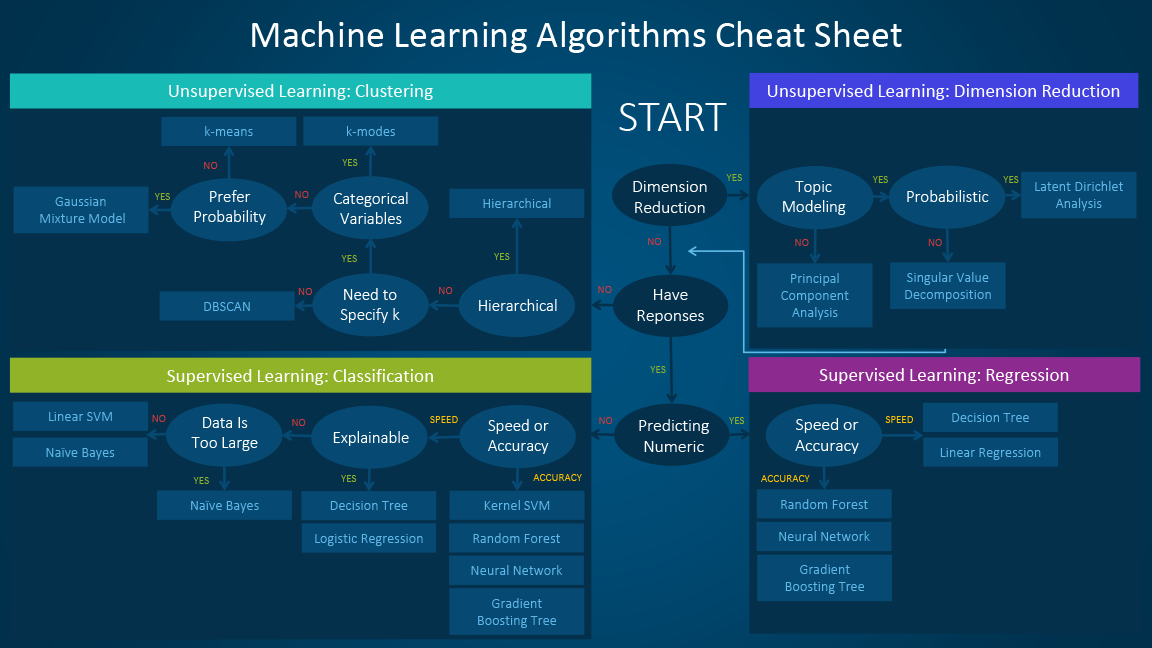

In [152]:
Image(filename='models.png') 

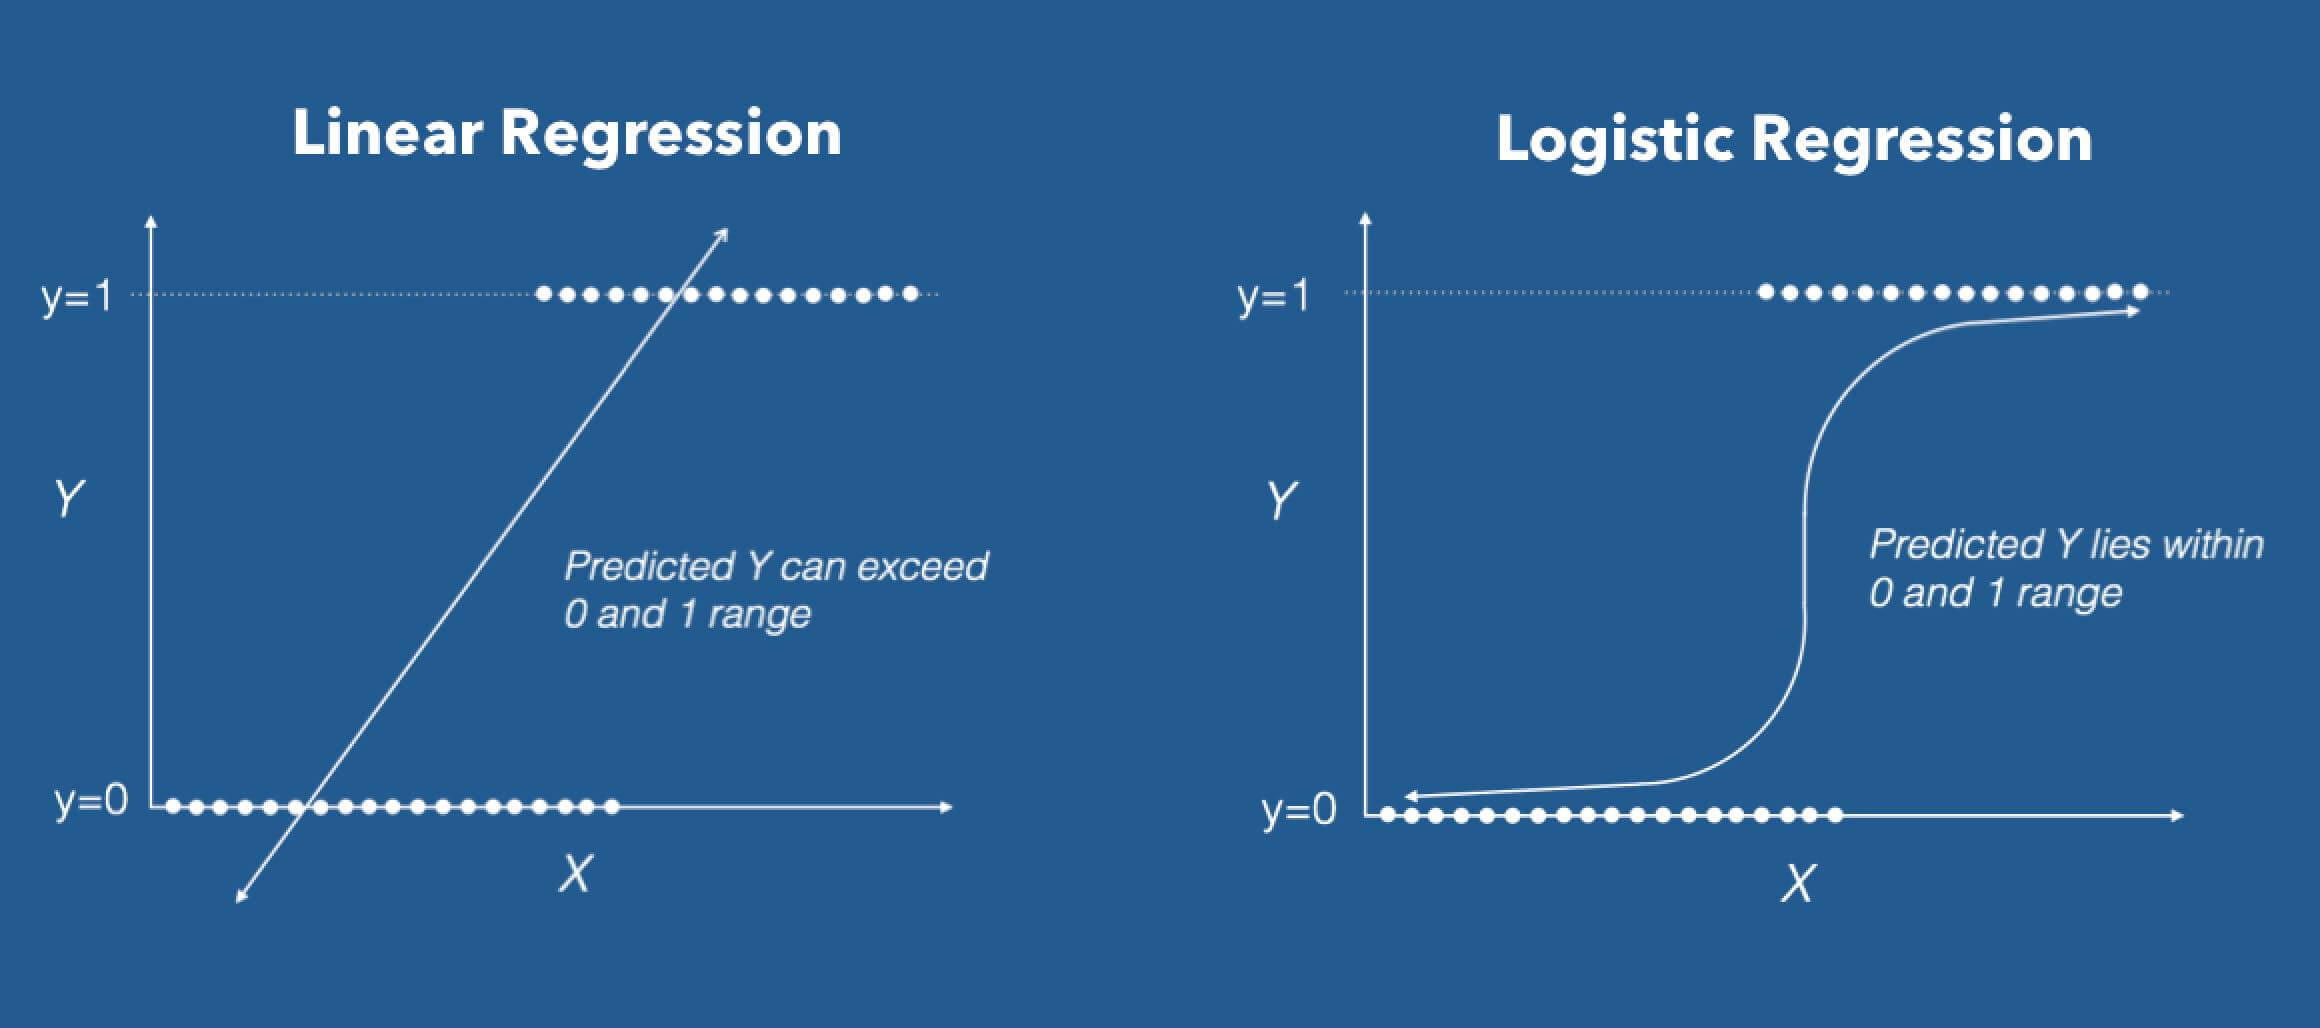

In [153]:
Image(filename='logr.jpg')

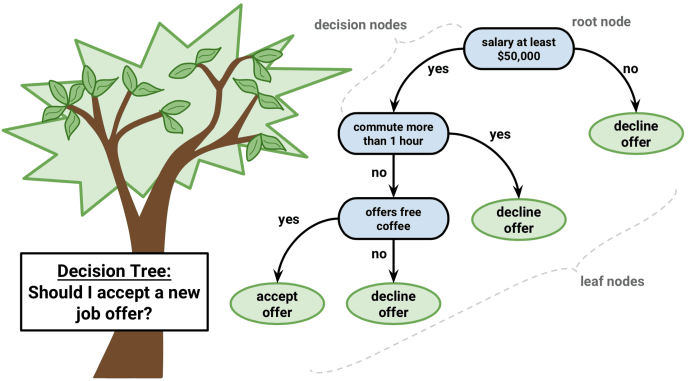

In [154]:
Image(filename='decision.png')

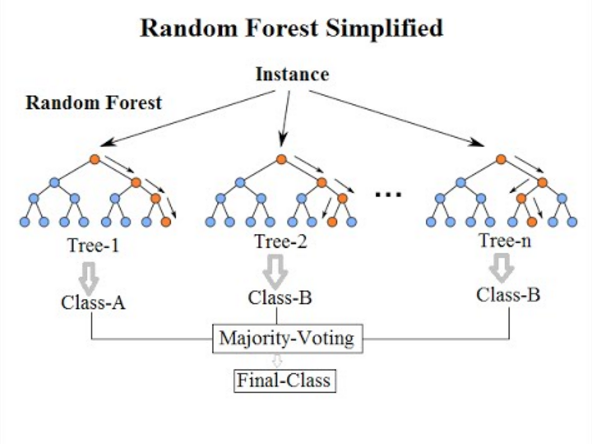

In [155]:
Image(filename='random.png')

# 第四节课

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [220]:
logr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [logr,dtree,rf]

In [158]:
logr.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [159]:
y_pred_test = logr.predict(xTest)
y_pred_train = logr.predict(xTrain)

In [160]:
np.mean(y_pred_test == yTest)

0.7877094972067039

In [161]:
np.mean(y_pred_train == yTrain)

0.8230337078651685

In [228]:
for model in models:
    print ('\nThe current model is', model)
    model.fit(xTrain, yTrain)
    print ('\nTraining accuracy is',np.mean(model.predict(xTrain) == yTrain))
    print ('\nTesting accuracy is',np.mean(model.predict(xTest) == yTest))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Training accuracy is 0.8230337078651685

Testing accuracy is 0.7877094972067039

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training accuracy is 0.9887640449438202

Testing accuracy is 0.770949720670391

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            m

In [224]:
for model in models:
    print ('\nThe current model is', model)
    model.fit(x2Train, y2Train)
    print ('\nTraining accuracy is',np.mean(model.predict(x2Train) == y2Train))
    print ('\nTesting accuracy is',np.mean(model.predict(x2Test) == y2Test))


The current model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Training accuracy is 0.8356741573033708

Testing accuracy is 0.8100558659217877

The current model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training accuracy is 0.9887640449438202

Testing accuracy is 0.770949720670391

The current model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            m

## 交叉验证

In [164]:
from sklearn.model_selection import KFold

In [165]:
def CVKFold(k, X, y, Model):

    # Random seed: reproducibility
    np.random.seed(1)

    # accuracy score 
    train_accuracy = [0 for i in range(k)] 
    test_accuracy = [0 for i in range(k)] 
   
    # index
    idx = 0
    
    # CV loop
    kf = KFold(n_splits = k, shuffle = True)
    
    # Generate the sets
    for train_index, test_index in kf.split(X):
        # Iteration number
        #print(train_index,len(train_index))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Calling the function/model
               
        if Model == "Logit":
            clf = LogisticRegression(random_state = 0)
                     
        if Model == "RForest":
            clf = RandomForestClassifier(random_state = 0)
            
        # Fit the model
        clf = clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        train_accuracy[idx] = np.mean(y_train_pred == y_train)
        test_accuracy[idx] = np.mean(y_test_pred == y_test)
        idx += 1

    print (train_accuracy)
    print (test_accuracy)
    return train_accuracy, test_accuracy

In [166]:
train_acc,test_acc = CVKFold(10,all_x,y,"Logit")

[0.8214731585518102, 0.8079800498753117, 0.8204488778054863, 0.8192019950124688, 0.8092269326683291, 0.8067331670822943, 0.8029925187032418, 0.814214463840399, 0.8129675810473815, 0.8154613466334164]
[0.7666666666666667, 0.8202247191011236, 0.7640449438202247, 0.7640449438202247, 0.8426966292134831, 0.797752808988764, 0.9101123595505618, 0.797752808988764, 0.8089887640449438, 0.8089887640449438]


In [167]:
np.mean(train_acc),np.mean(test_acc)

(0.8130700091220138, 0.80812734082397)

In [168]:
train_acc,test_acc = CVKFold(10,all_x,y,"RForest")

[0.9662921348314607, 0.9688279301745636, 0.9825436408977556, 0.9788029925187033, 0.9763092269326683, 0.9750623441396509, 0.9663341645885287, 0.9663341645885287, 0.9738154613466334, 0.972568578553616]
[0.7333333333333333, 0.8426966292134831, 0.7640449438202247, 0.8089887640449438, 0.8202247191011236, 0.797752808988764, 0.8202247191011236, 0.8089887640449438, 0.8876404494382022, 0.7865168539325843]


In [169]:
np.mean(train_acc),np.mean(test_acc)

(0.972689063857211, 0.8070411985018726)

# 第五节课

In [170]:
#观望一下数据，这个函数可以供你看到除了表头的前五行数据
xTrain.head()

,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
140,3,19.0,0,2,15.2458,3,3,0,0,0,1,2
439,2,31.0,0,0,10.5000,1,1,1,1,2,1,1
817,2,31.0,1,1,37.0042,1,3,0,1,0,1,3
378,3,20.0,0,0,4.0125,1,1,1,1,0,1,0
491,3,21.0,0,0,7.2500,1,1,1,1,2,1,0


In [171]:
##查看训练集的数据维度
xTrain.shape

(712, 12)

In [172]:
#分别创建名为logr，dtree，rf的逻辑回归，决策树和随机森林对象
logr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

### Logistic Regression

In [173]:
#调用LogisticRegression的fit方法对数据集进行拟合，C为正则化系数λ的倒数，通常默认为1，class_weight参数用于标示分类模型中各种类型的权重，
#dual：一个布尔值，如果为true，则求解对偶形式（只在penalty=‘l2’且solver=‘lib-linear’有对偶形式），如果为false，则求解原始形式，
#默认为false；fit_intercept，是否存在截距，默认存在；intercept_scaling:一个浮点数，只有当solver='liblinear'才有意义。当采用
#fit_intcept时相当于人造一个特征出来，特征恒为1，权重为b。在计算正则化项的时候，该人造特征也被考虑了，因此为了降低这个人造特征的影响，
#需要提供intercept_scaling；max_iter:一个整数，指定最大迭代次数；multi_class:一个字符串，指定对于多分类问题的策略，可以为如下值，
#ovr:采用one-vs-rest策略；multinomial:直接采用多分类逻辑回归策略。n_jobs：一个正数。指定任务并行时的cpu数量。如果为-1则使用所有可用的CPU。
#random_state:一个整数或者一个RandomState实例或者none。
#如果为整数，则它指定了随机数生成器的种子，如果为RandomState实例，则指定了随机数生成器。如果为none则使用默认是随机数生成器。
#solver:一个字符串，指定了求解最优化问题的算法，可以为如下值：newton-cg:使用牛顿法；lbfgs:使用L-BFGS拟牛顿法；
#liblinear:使用liblinear;sag:使用stochastic average gradient descent算法。注：对于规模小的数据集，liblinear比较适用，对于规模大的数据集，
#sag比较适用，而newton-cg,lbfgs、sag只处理penalty='l2'的情况。tol:一个浮点数，指定判断迭代收敛与否的阈值。
#verbose:一个正数。用于开启/关闭迭代中间输出日志功能。warm_start:一个布尔值，如果为true，那么使用前一次训练结果继续训练，否则从头开始训练。
logr.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [174]:
#查看拟合后logistic regression模型的intercept值
logr.intercept_

array([1.53436405])

In [175]:
#查看拟合后logistic regression模型的coef值
logr.coef_

array([[-0.59398412, -0.01599065, -0.81299548, -0.50226415,  0.00321659,
         0.71216015,  0.21910442, -0.06197902, -1.93831832, -0.13443228,
        -0.19570416,  0.20499853]])

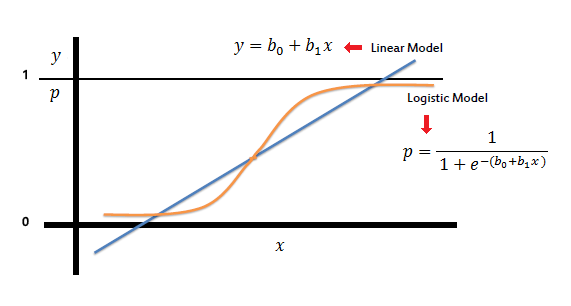

In [176]:
#打开名为“logrformular.png“的图像
Image(filename='logrformular.png')

-(1.6976 - 0.6*Pclass - 0.034*Age - 0.875*SipSb - 0.557*Parch + 0.00328*Fare
 + 0.715*Title + 0.2645*FamilySize - 0.018*IsAlone - 1.99*Sex_Code - 0.123*Embarked_Code
 + 0.019*AgeBin + 0.22*FareBin)

### Decision Tree

In [177]:
#载入graphviz数据包，以及从sklearn中载入tree数据包：graphviz是AT&T实验室开源的画图工具，
import graphviz
from sklearn import tree

In [229]:
#创建名为dtree的决策树对象
dtree = DecisionTreeClassifier()

In [235]:
#调用DecisionTree的fit方法对数据集进行拟合
#class_weight:dict,list of dicts,"Banlanced" or None,可选（默认为None）
#criterion:string类型，可选（默认为"gini"）衡量分类的质量。支持的标准有："gini"代表的是Gini impurity(不纯度)；
#"entropy"代表的是information gain（信息增益）。
#max_depth:int or None,可选（默认为"None"）表示树的最大深度。如果是"None",则节点会一直扩展直到所有的叶子都是纯的或者所有的叶子节点都包含
#少于min_samples_split个样本点。忽视max_leaf_nodes是不是为None。
#max_features:int,float,string or None 可选（默认为None），在进行分类时需要考虑的特征数。None，max_features=n_features 注意：至少找到一个
#样本点有效的被分类时，搜索分类才会停止。
#max_leaf_nodes:int,None 可选（默认为None）在最优方法中使用max_leaf_nodes构建一个树。最好的节点是在杂质相对减少。
#如果是None则对叶节点的数目没有限制。如果不是None则不考虑max_depth.
#min_impurity_decrease : float, optional (default=0.)如果该分裂导致杂质的减少大于或等于该值，则将分裂节点。
#min_samples_leaf:int,float,可选（默认为1）一个叶节点所需要的最小样本数。
#min_samples_split:int,float,可选（默认为2）区分一个内部节点需要的最少的样本数。
#min_weight_fraction_leaf:float,可选（默认为0）一个叶节点的输入样本所需要的最小的加权分数。
#persort:bool,可选（默认为False）是否预分类数据以加速训练时最好分类的查找。在有大数据集的决策树中，如果设为true可能会减慢训练的过程。
#当使用一个小数据集或者一个深度受限的决策树中，可以减速训练的过程。
#random_state:int,RandomState instance or None；如果是None，随机数字发生器是np.random使用的RandomState instance.
#splitter:string类型，可选（默认为"best"） 一种用来在节点中选择分类的策略。支持的策略有"best"，选择最好的分类，"random"选择最好的随机分类。
dtree.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [197]:
#利用tree的export_graphviz以DOT形式提取决策树
dot_data = tree.export_graphviz(dtree, out_file=None,feature_names=xTrain.columns,filled=True, rounded=True) 

In [198]:
#将DOT形式的决策树源码字符串形式
graph = graphviz.Source(dot_data) 

In [199]:
#用pdf存储源码
graph.render('dtree')

'dtree_res.pdf'

### Random Forest

In [200]:
#创建名为rf_10的随机森林对象，森林里决策树的数目为10
rf_10 = RandomForestClassifier(n_estimators=10)

In [201]:
#调用RandomForestClassifier的fit方法对数据集进行拟合
#bootstrap=True：是否有放回的采样。  
#max_features: 选择最适属性时划分的特征不能超过此值。当为整数时，即最大特征数；当为小数时，训练集特征数*小数；
#if “auto”, then max_features=sqrt(n_features).
#n_estimators=10：决策树的个数，越多越好，但是性能就会越差，至少100左右
#n_jobs=1：并行job个数。这个在ensemble算法中非常重要，尤其是bagging（而非boosting，因为boosting的每次迭代之间有影响，所以很难进行并行化），
#因为可以并行从而提高性能。1=不并行；n：n个并行；-1：CPU有多少core，就启动多少job。
#oob_score=False：oob（out of band，带外）数据，即：在某次决策树训练中没有被bootstrap选中的数据。
#verbose:(default=0) 是否显示任务进程
#warm_start=False：热启动，决定是否使用上次调用该类的结果然后增加新的。  
rf_10.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [203]:
#查看刚才创建的决策树中的第五棵树
rf_5 = rf_10.estimators_[5]

In [204]:
#利用tree的export_graphviz以DOT形式提取决策树
dot_data = tree.export_graphviz(rf_5, out_file=None,feature_names=xTrain.columns,filled=True, rounded=True) 

In [205]:
#将DOT形式的决策树源码字符串形式
graph = graphviz.Source(dot_data) 

In [207]:
#用pdf存储源码
graph.render('rftree')

'rftree.pdf'

### Overfitting 过度拟合

In [ ]:
#无论在机器学习还是深度学习建模当中都可能会遇到两种最常见结果，一种叫过拟合（over-fitting ）另外一种叫欠拟合（under-fitting）。
#所谓过拟合（over-fitting）其实就是所建的机器学习模型或者是深度学习模型在训练样本中表现得过于优越，导致在验证数据集以及测试数据集中表现不佳。
#过拟合就是学到了很多没必要的特征。

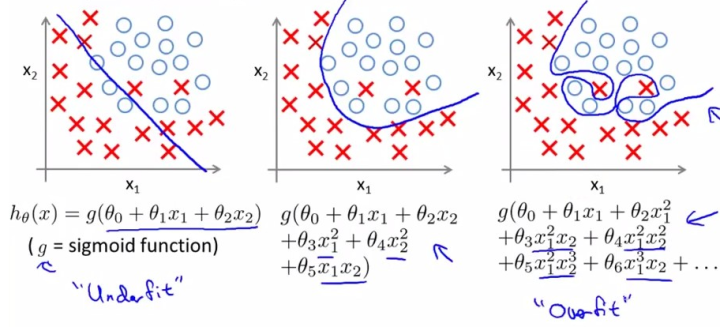

In [208]:
#导入图像，诠释什么是过度拟合
Image(filename='overfit.png')

In [241]:
#利用decisiontree的predict预测测试集和训练集
y_pred_train = dtree.predict(xTrain)
y_pred_test = dtree.predict(xTest)

In [242]:
#利用numpy数据包的mean取平均，评估预测的精确度
np.mean(y_pred_train == yTrain),np.mean(y_pred_test == yTest)

(0.9887640449438202, 0.7653631284916201)

In [246]:
#创建名为dtree2的决策树对象，规定树的最大深度为5，构成一个内部节点的样本最少为5个
dtree2 = DecisionTreeClassifier(max_depth=5,min_samples_split=5)

In [248]:
#利用DecisionTreeClassifier的fit方法拟合xy训练集
dtree2.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [249]:
#利用numpy数据包的mean取平均，评估预测的精确度
np.mean(dtree2.predict(xTrain) == yTrain),np.mean(dtree2.predict(xTest) == yTest)

(0.8525280898876404, 0.8379888268156425)